# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 9383 Мосин Константин, Нистратов Дмитрий и Соседков Кирилл. Вариант №6

## Цель работы
Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Пункт 1
Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $s(t)$

Выходной сигнал: $y(t)=A+Bt$

МНК по пяти точкам: $F(A,B)=\sum^{2}_{k=-2}(s_k-y_k)^2=\sum^{2}_{k=-2}(s_k-A-Bk)^2 \Rightarrow min$

Система нормальных уравненией $$\begin{cases}5A+0B=\sum^{k=2}_{k=-2}s_k\\0A+10B=\sum^{k=2}_{k=-2}ks_k\end{cases}$$

В итоге получаем: $$y_0=A=\frac{1}{5}\sum_{k=-2}^{k=2}s_k=\frac{1}{5}(s_{-2}+s_{-1}+s_0+s_1+s_2)$$

В общем случае: $$y_n=\frac{1}{5}\sum_{k=n-2}^{k=n+2}s_k=\frac{1}{5}(s_{n-2}+s_{n-1}+s_n+s_{n+1}+s_{n+2})$$ $s_n=e^{i\omega n}$ $$y_n=\frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$$ $$H(\omega)=\frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})$$ $$H(\omega)=0.2[1+2cos(\omega)+2cos(2\omega)]$$ $$H(\omega)=\frac{e^{i\frac{5\omega}{2}}-e^{-i\frac{5\omega}{2}}}{5(e^{i\frac{\omega}{2}}-e^{-i\frac{\omega}{2}})}=\frac{sin(\frac{5\omega}{2})}{5sin(\frac{\omega}{2})}$$ $$H(\omega)=H(2\pi f)=\tilde H(f)$$

Для $2m+1$ точек имеем: $$H(\omega)=\frac{1}{2m+1}[1+2cos(\omega)+2cos(2\omega)+...+2cos(m\omega)]$$ или $$H(\omega)=\frac{sin(\frac{(2m+1)\omega}{2})}{(2m+1)sin(\frac{\omega}{2})}$$

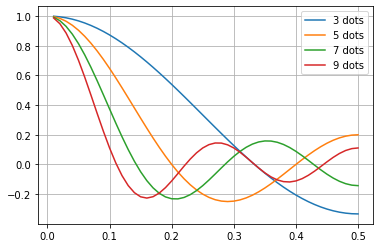

In [3]:
H_w = lambda m, w: (np.sin((2 * m + 1) * w / 2)) / ((2 * m + 1) * np.sin(w / 2))
x = np.linspace(0.01, 0.5)

plt.plot(x, H_w(1, x * 2 * np.pi), label='3 dots') # 2 * 1 + 1 = 3 точки
plt.plot(x, H_w(2, x * 2 * np.pi), label='5 dots') # 2 * 2 + 1 = 5 точек
plt.plot(x, H_w(3, x * 2 * np.pi), label='7 dots') # 7 точек
plt.plot(x, H_w(4, x * 2 * np.pi), label='9 dots') # 9 точек
plt.grid() # сеточка
plt.legend() # легенда
plt.show()

Вывод: чем больше точек, тем больше подавление частоты, после которой следует колебательный процесс, длительность которого обратнопропорциональна количеству точек.

#### Пункт 2
Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $s(t)$

Выходной сигнал: $y(t)=A+Bt+Ct^2$

МНК: $$F(A,B,C)=\sum(s_k-A-Bk-Ck^2)^2 \Rightarrow min$$ 7 точек: $$y_n=\frac{1}{21}(-2s_{n-3}+3s_{n-2}+6s_{n-1}+7s_{n}+6s_{n+1}+3s_{n+2}-2s_{n+3})$$ $$H(\omega)=\frac{1}{21}[7+12cos(\omega)+6cos(2\omega)-4cos(3\omega)]$$ 9 точек: $$y_n = \frac{1}{231}(-21s_{n-4}+14s_{n-3}+39s_{n-2}+54s_{n-1}+59s_{n}+54s_{n+1}+39s_{n+2}+14s_{n+3}-21s_{n+4})$$ $$H(\omega)=\frac{1}{231}[59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)]$$ 11 точек: $$y_n=\frac{1}{429}(-36s_{n-5}+9s_{n-4}+44s_{n-3}+69s_{n-2}+84s_{n-1}+89s_{n}+84s_{n+1}+69s_{n+2}+44s_{n+3}+9s_{n+4}-36s_{n+5})$$ $$H(\omega)=\frac{1}{429}[89+168cos(\omega)+138cos(2\omega)+88cos(3\omega)+18cos(4\omega)-72cos(5\omega)]$$ 13 точек: $$y_n=\frac{1}{143}(-11s_{n-6}+9s_{n-4}+16s_{n-3}+21s_{n-2}+24s_{n-1}+25s_{n}+24s_{n+1}+21s_{n+2}+16s_{n+3}+9s_{n+4}-11s_{n+6})$$ $$H(\omega)=\frac{1}{143}[25+48cos(\omega)+42cos(2\omega)+32cos(3\omega)+18cos(4\omega)-22cos(6\omega)]$$

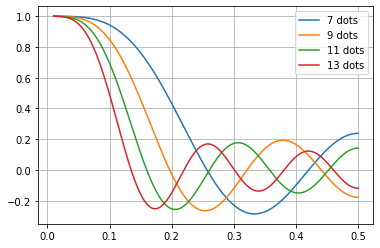

In [4]:
H_w_5 = lambda w: (1/35) * (17 + 24*np.cos(w)-6*np.cos(2*w))
H_w_7 = lambda w: (1/21) * (7+12*np.cos(w)+6*np.cos(2*w)-4*np.cos(3*w))
H_w_9 = lambda w: (1/231) * (59+108*np.cos(w)+78*np.cos(2*w)+28*np.cos(3*w)-42*np.cos(4*w))
H_w_11 = lambda w: (1/429) * (89+168*np.cos(w)+138*np.cos(2*w)+88*np.cos(3*w)+18*np.cos(4*w)-72*np.cos(5*w))
H_w_13 = lambda w: (1/143) * (25+48*np.cos(w)+42*np.cos(2*w)+32*np.cos(3*w)+18*np.cos(4*w)-22*np.cos(6*w))

x = np.linspace(0.01, 0.5, 10000)

plt.plot(x, H_w_7(x * 2 * np.pi), label='7 dots')
plt.plot(x, H_w_9(x * 2 * np.pi), label='9 dots')
plt.plot(x, H_w_11(x * 2 * np.pi), label='11 dots')
plt.plot(x, H_w_13(x * 2 * np.pi), label='13 dots')
plt.grid()
plt.legend()
plt.show()

Вывод: чем больше точек, тем больше подавление частоты, после которой следует колебательный процесс, длительность которого обратнопропорциональна количеству точек. В отличие от сглаживания прямой линией окно частот, для которых не происходит подавление, шире.

#### Пункт 3

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $s(t)$

Выходной сигнал: $y(t)=A+Bt+Ct^2+Dt^3+Et^4$

МНК: $$F(A,B,C)=\sum(s_k-A-Bk-Ck^2-Dk^3-Ek^4)^2 \Rightarrow min$$ 

Аналогично, как сделано в предыдущих пунктах, можно получить следующую систему(пример для 7 точек):
$$
\left(\begin{array}{cc} 
\sum_{m=3}^{-3} 1 & ... & \sum_{m=3}^{-3} m^4 \\
\sum_{m=3}^{-3} m & ... & \sum_{m=3}^{-3} m^5 \\
\sum_{m=3}^{-3} m^2 & ... & \sum_{m=3}^{-3} m^6 \\
\sum_{m=3}^{-3} m^3 & ... & \sum_{m=3}^{-3} m^7 \\
\sum_{m=3}^{-3} m^4 & ... & \sum_{m=3}^{-3} m^8 \\
\end{array}\right)
\left(\begin{array}{cc} 
A\\ 
B\\
C\\
D\\
E\\
\end{array}\right)
= 
\left(\begin{array}{cc} 
\sum_{m=3}^{-3} s_m\\ 
\sum_{m=3}^{-3} s_m m\\
\sum_{m=3}^{-3} s_m m^2\\
\sum_{m=3}^{-3} s_m m^3\\
\sum_{m=3}^{-3} s_m m^4\\
\end{array}\right)
$$ 

Можно оставить только нечетные:

$$
\left(\begin{array}{cc} 
\sum_{m=3}^{-3} 1 & ... & \sum_{m=3}^{-3} m^4 \\
\sum_{m=3}^{-3} m^2 & ... & \sum_{m=3}^{-3} m^6 \\
\sum_{m=3}^{-3} m^4 & ... & \sum_{m=3}^{-3} m^8 \\
\end{array}\right)
\left(\begin{array}{cc} 
A\\ 
C\\
E\\
\end{array}\right)
= 
\left(\begin{array}{cc} 
\sum_{m=3}^{-3} s_m\\ 
\sum_{m=3}^{-3} s_m m^2\\
\sum_{m=3}^{-3} s_m m^4\\
\end{array}\right)
$$ 

После решения системы можно получить следующий результат:

Для 9 точек:

$$\displaystyle H_9(f) = \frac{1}{429}\Big(179 + 270cos\big(2\pi f\big) + 60 cos\big(4\pi f\big) - 110 cos\big(6 \pi f\big) + 30 cos\big(8\pi f\big)\Big)$$
    
Для 11 точек:

$$ H_{11}(f) = \frac{1}{429}\Big(143 + 240cos\big(2\pi f\big) + 120 cos\big(4\pi f\big) - 20 cos\big(6 \pi f\big) - 90 cos\big(8\pi f\big) + 36cos\big(10\pi f\big))$$
    
Для 13 точек:
    
$$\displaystyle H_{13}(f) = \frac{1}{2431}\Big(677 + 1200 cos\big(2\pi f\big) + 780 cos\big(4\pi f\big) + 220 cos\big(6 \pi f\big) - 270 cos\big(8\pi f\big) - 396 cos\big(10\pi f\big) + 220 cos(12\pi f)\Big)$$
    
Для 15 точек:

$$\displaystyle H_{15}(f) = \frac{1}{46189}\Big(11063 + 20250 cos\big(2\pi f\big) + 15000 cos\big(4\pi f\big) + 7510 cos\big(6 \pi f\big) - 330 cos\big(8\pi f\big) - 5874 cos\big(10\pi f\big) + 5720 cos(12\pi f) + 4290 cos(14\pi f)\Big)$$


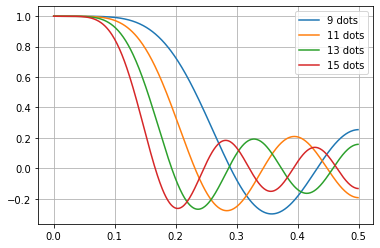

In [5]:
H9 = lambda f: 1 / 429 * (179 + 270*np.cos(2*np.pi*f) + 60*np.cos(4*np.pi*f) - 110*np.cos(6*np.pi*f) + 30*np.cos(8*np.pi*f))
H11 = lambda f: 1 / 429 * (143 + 240*np.cos(2*np.pi*f) + 120*np.cos(4*np.pi*f) - 20*np.cos(6*np.pi*f) - 90*np.cos(8*np.pi*f) + 36*np.cos(10*np.pi*f))
H13 = lambda f: 1 / 2431 * (677 + 1200*np.cos(2*np.pi*f) + 780*np.cos(4*np.pi*f) + 220*np.cos(6*np.pi*f) - 270*np.cos(8*np.pi*f) - 396*np.cos(10*np.pi*f) + 220*np.cos(12*np.pi*f))
H15 = lambda f: 1 / 46189 * (11063 + 20250*np.cos(2*np.pi*f) + 15000*np.cos(4*np.pi*f) + 7510*np.cos(6*np.pi*f) - 330*np.cos(8*np.pi*f) - 5874*np.cos(10*np.pi*f) - 5720*np.cos(12*np.pi*f) + 4290*np.cos(14*np.pi*f))

t = np.arange(0, 0.5, 0.001)
plt.plot(t, H9(t), label='9 dots')
plt.plot(t, H11(t), label='11 dots')
plt.plot(t, H13(t), label='13 dots')
plt.plot(t, H15(t), label='15 dots')
plt.grid() # сеточка
plt.legend() # легенда
plt.show()

#### Пункт 4

Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.
### Формулы Спенсера
Для 15 точек:
$$y_n = \frac{1}{320}[-3x_{n-7} - 6x_{n-6} - 5x_{n-5} + 3x_{n-4} + 21x_{n-3} + 46x_{n-2} + 67x_{n-1} + 74x_{n} + 67x_{n+1} + 46x_{n+2} + 21x_{n+3} + 3x_{n+4} - 5x_{n+6} - 6x_{n+6} - 3x_{n+7}]$$
$$S(\omega)_{15}=\frac{1}{320}[74 + 134*cos(\omega)+92*cos(2*\omega)+42*cos(3*\omega)+6*cos(4*\omega)-10*cos(5*\omega)-12*cos(6*\omega)-6*cos(7*\omega)]$$
Для 21 точки:
$$y_n = \frac{1}{350}[-x_{n-10} - 3x_{n-9} - 5x_{n-8} - 5x_{n-7} - 2x_{n-6} + 6x_{n-5} + 18x_{n-4} + 33x_{n-3} + 47x_{n-2} + 57x_{n-1} + 60x_{n} + 57x_{n-1} + ... ]$$
$$S(\omega)_{21}=\frac{1}{350}[60 + 114*cos(\omega)+94*cos(2*\omega)+66*cos(3*\omega)+36*cos(4*\omega)+12*cos(5*\omega)-4*cos(6*\omega)-10*cos(7*\omega)-10*cos(8*\omega)-6*cos(9*\omega)-2*cos(10*\omega)]$$

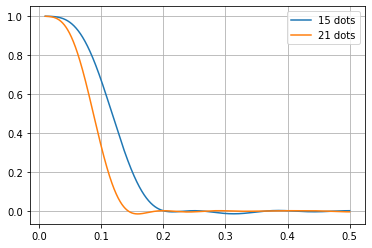

In [6]:
S_w_15 = lambda w: (1/320) * (74 + 134*np.cos(w)+92*np.cos(2*w)+42*np.cos(3*w)+6*np.cos(4*w)-10*np.cos(5*w)-12*np.cos(6*w)-6*np.cos(7*w))
S_w_21 = lambda w: (1/350) * (60 + 114*np.cos(w)+94*np.cos(2*w)+66*np.cos(3*w)+36*np.cos(4*w)+12*np.cos(5*w)-4*np.cos(6*w)-10*np.cos(7*w)-10*np.cos(8*w)-6*np.cos(9*w)-2*np.cos(10*w))

x = np.linspace(0.01, 0.5, 10000)

plt.plot(x, S_w_15(x * 2 * np.pi), label='15 dots')
plt.plot(x, S_w_21(x * 2 * np.pi), label='21 dots')
plt.grid()
plt.legend()
plt.show()

#### Пункт 5

Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

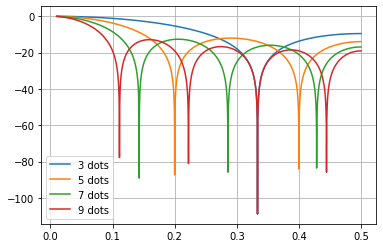

In [7]:
H_w_log = lambda H: np.array(20*np.log10(np.abs([h if h != 0 else 0.01 for h in H])))

plt.plot(x, H_w_log(H_w(1, x * 2 * np.pi)), label='3 dots')
plt.plot(x, H_w_log(H_w(2, x * 2 * np.pi)), label='5 dots')
plt.plot(x, H_w_log(H_w(3, x * 2 * np.pi)), label='7 dots')
plt.plot(x, H_w_log(H_w(4, x * 2 * np.pi)), label='9 dots')
plt.grid()
plt.legend()
plt.show()

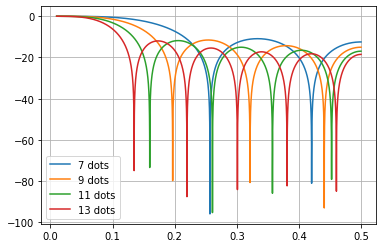

In [8]:
plt.plot(x, H_w_log(H_w_7(x * 2 * np.pi)), label='7 dots')
plt.plot(x, H_w_log(H_w_9(x * 2 * np.pi)), label='9 dots')
plt.plot(x, H_w_log(H_w_11(x * 2 * np.pi)), label='11 dots')
plt.plot(x, H_w_log(H_w_13(x * 2 * np.pi)), label='13 dots')
plt.grid()
plt.legend()
plt.show()

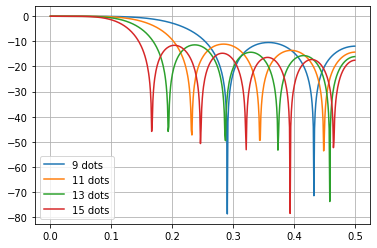

In [9]:
plt.plot(t, H_w_log(H9(t)), label='9 dots')
plt.plot(t, H_w_log(H11(t)), label='11 dots')
plt.plot(t, H_w_log(H13(t)), label='13 dots')
plt.plot(t, H_w_log(H15(t)), label='15 dots')
plt.grid() # сеточка
plt.legend() # легенда
plt.show()

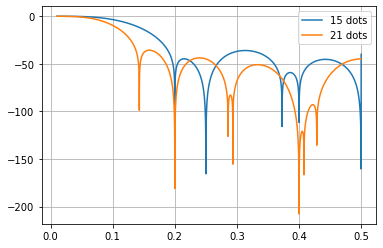

In [10]:
plt.plot(x, H_w_log(S_w_15(x * 2 * np.pi)), label='15 dots')
plt.plot(x, H_w_log(S_w_21(x * 2 * np.pi)), label='21 dots')
plt.grid()
plt.legend()
plt.show()

#### Пункт 6

Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении пп. 1–4.

В ходе выполняния пп. 1-4 были выведены следующие свойства: 
- Увеличение степени полинома, увеличивает размер окна низких частот
- Увеличение кол-ва точек, увеличивает спад кривых передаточных функций
- При использовании формул Спенсера, уменьшение амлитуды происходит гораздо быстрее


### Выводы



В ходе выполнения лабораторной работы был проведён анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.  
Были смоделированы и графичски отображены передаточные функции исследуемых фильтров. Также был проведен сравнительный анализ смоделированных фильтров.